## 1) Провести предобработку текстов, удалив стоп-слова и преобразовав слова в леммы. (в реальных задачах также необходимо проводить морфологический анализ и частеречную разметку)



In [ ]:
!wget https://github.com/natasha/corus/raw/master/data/ria.json.gz

--2023-05-24 19:35:40--  https://github.com/natasha/corus/raw/master/data/ria.json.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/natasha/corus/master/data/ria.json.gz [following]
--2023-05-24 19:35:40--  https://raw.githubusercontent.com/natasha/corus/master/data/ria.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13768 (13K) [application/octet-stream]
Saving to: ‘ria.json.gz’

ria.json.gz         100%[===================>]  13.45K  --.-KB/s    in 0s      

2023-05-24 19:35:40 (78.0 MB/s) - ‘ria.json.gz’ saved [13768/13768]



In [ ]:
!gzip -d ria.json.gz

In [ ]:
import pandas as pd

df = pd.read_json('ria.json', lines=True)
df

text  \
0  <p><strong></strong></p>\n<p><strong>москва, 3...   
1  <p><strong></strong></p>\n<p><strong>киев, 31 ...   
2  <p><strong></strong></p>\n<p><strong>киев, 31 ...   
3  <p><strong></strong></p>\n<p><strong>мехико, 3...   
4  <p><strong></strong></p>\n<p><strong>москва, 3...   
5  <p><strong></strong></p>\n<p><strong>сараево, ...   
6  <p><strong></strong></p>\n<p><strong>афины, 31...   
7  <p><strong>москва, 31 янв &ndash; риа новости....   
8  <p><strong></strong></p>\n<p><strong>афины, 31...   
9  <p><strong></strong></p>\n<p><strong>москва, 3...   

                                               title  
0  большинство детей, которых пытались увезти в с...  
1  луценко будет работать в команде тимошенко, ес...  
2  "лютые" выборы: есть ли вероятность второго ма...  
3  жертвами бойни на севере мексики стали 13 моло...  
4  немец беррер выиграл теннисный турнир на родин...  
5  переходное торговое соглашение сербии с ес вст...  
6  генсек оон уверен в успехе мирных переговоров ...  
7  "байер" вернулся в лидеры чемпионата германии ...  
8  генсек оон прибыл на кипр, чтобы помочь мирным...  
9  ликвидирован пожар в гаражном кооперативе на з...

In [ ]:
# приведение к нижнему регистру
df['text'].str.lower()
df['title'].str.lower()

0    большинство детей, которых пытались увезти в с...
1    луценко будет работать в команде тимошенко, ес...
2    "лютые" выборы: есть ли вероятность второго ма...
3    жертвами бойни на севере мексики стали 13 моло...
4    немец беррер выиграл теннисный турнир на родин...
5    переходное торговое соглашение сербии с ес вст...
6    генсек оон уверен в успехе мирных переговоров ...
7    "байер" вернулся в лидеры чемпионата германии ...
8    генсек оон прибыл на кипр, чтобы помочь мирным...
9    ликвидирован пожар в гаражном кооперативе на з...
Name: title, dtype: object

In [ ]:
import numpy as np
from sklearn.metrics import *
from pprint import pprint

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   title   10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [ ]:
lst = df.values.tolist()
lst

[['<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> большая часть из 33 детей, которых граждане сша пытались вывезти из гаити в организованный в доминиканской республике приют, не являются сиротами, сообщает в воскресенье <a href="http://www.afp.com" target="_blank">агентство франс пресс</a> со ссылкой на заявление представителя международной организации "детские деревни sos" (sos children\'s village), оказывающей помощь детям, оставшимся без родителей</p>\n<p>как заявила агентству патрисия варгас (patricia vargas), курирующая программы "детских деревень sos" в центральной америке, мексике и на карибах, поговорив с детьми она выяснила, что родители многих из них живы. некоторые дети смогли назвать свои домашние адреса и номера телефонов, что дает возможность связаться с их родителями.</p>\n<p>в это воскресенье <a href="http://rian.ru/society/20100131/207037914.html" target="_blank">гаитянская полиция задержала десятерых граждан сша</a>, подозреваемых в попытк

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

stopwords = stopwords.words('russian')
tokenizer = RegexpTokenizer(r'[а-я]+')


#for index in range(len(lst)):
    for row in range(len(lst[index])):
        temp_text = lst[index][row]
        lst[index][row] = [word for word in tokenizer.tokenize(temp_text) if word not in stopwords]
        for word in lst[index][row]:
            m = Mystem()
            temp_word = word
            word = m.lemmatize(str(temp_word))
            #print(lemma[0])

lst

[[['москва',
   'янв',
   'риа',
   'новости',
   'большая',
   'часть',
   'детей',
   'которых',
   'граждане',
   'сша',
   'пытались',
   'вывезти',
   'гаити',
   'организованный',
   'доминиканской',
   'республике',
   'приют',
   'являются',
   'сиротами',
   'сообщает',
   'воскресенье',
   'агентство',
   'франс',
   'пресс',
   'ссылкой',
   'заявление',
   'представителя',
   'международной',
   'организации',
   'детские',
   'деревни',
   'оказывающей',
   'помощь',
   'детям',
   'оставшимся',
   'родителей',
   'заявила',
   'агентству',
   'патрисия',
   'варгас',
   'курирующая',
   'программы',
   'детских',
   'деревень',
   'центральной',
   'америке',
   'мексике',
   'карибах',
   'поговорив',
   'детьми',
   'выяснила',
   'родители',
   'многих',
   'живы',
   'некоторые',
   'дети',
   'смогли',
   'назвать',
   'свои',
   'домашние',
   'адреса',
   'номера',
   'телефонов',
   'дает',
   'возможность',
   'связаться',
   'родителями',
   'это',
   'воскресен

In [ ]:
import json

# Сохраняем список в файл в формате JSON
with open('lst.json', 'w') as f:
    json.dump(lst, f)

NameError: ignored

In [ ]:
import json

# Читаем список из файла в формате JSON
with open('lst_true.json', 'r') as f:
    lst = json.load(f)

lst

[['москва',
  'янва',
  'риа',
  'новость',
  'больший',
  'часть',
  'ребенок',
  'который',
  'гражданин',
  'сша',
  'пытаться',
  'вывозить',
  'гаити',
  'организованный',
  'доминиканский',
  'республика',
  'приют',
  'являться',
  'сирота',
  'сообщать',
  'воскресение',
  'агентство',
  'франс',
  'пресс',
  'ссылка',
  'заявление',
  'представитель',
  'международный',
  'организация',
  'детский',
  'деревня',
  'оказывать',
  'помощь',
  'ребенок',
  'оставаться',
  'родитель',
  'заявлять',
  'агентство',
  'патрисия',
  'варгас',
  'курировать',
  'программа',
  'детский',
  'деревня',
  'центральный',
  'америка',
  'мексика',
  'кариб',
  'поговорить',
  'ребенок',
  'выяснять',
  'родитель',
  'многий',
  'живой',
  'некоторые',
  'ребенок',
  'смочь',
  'называть',
  'свой',
  'домашние',
  'адрес',
  'номер',
  'телефон',
  'давать',
  'возможность',
  'связываться',
  'родитель',
  'это',
  'воскресение',
  'гаитянский',
  'полиция',
  'задерживать',
  'десятеро',
 

## 2) Вычислить показатели TF-IDF для определения слов, формирующих уникальность каждого текста, на униграммах (дополнительная задача: на биграммах).

In [ ]:
for index in range(len(lst)):
    for row in range(len(lst[index])):
        temp_text = lst[index][row]
        lst[index][row] = str(temp_text).replace("[", "").replace("]", "").replace("'", "")

lst

[['москва',
  'янва',
  'риа',
  'новость',
  'больший',
  'часть',
  'ребенок',
  'который',
  'гражданин',
  'сша',
  'пытаться',
  'вывозить',
  'гаити',
  'организованный',
  'доминиканский',
  'республика',
  'приют',
  'являться',
  'сирота',
  'сообщать',
  'воскресение',
  'агентство',
  'франс',
  'пресс',
  'ссылка',
  'заявление',
  'представитель',
  'международный',
  'организация',
  'детский',
  'деревня',
  'оказывать',
  'помощь',
  'ребенок',
  'оставаться',
  'родитель',
  'заявлять',
  'агентство',
  'патрисия',
  'варгас',
  'курировать',
  'программа',
  'детский',
  'деревня',
  'центральный',
  'америка',
  'мексика',
  'кариб',
  'поговорить',
  'ребенок',
  'выяснять',
  'родитель',
  'многий',
  'живой',
  'некоторые',
  'ребенок',
  'смочь',
  'называть',
  'свой',
  'домашние',
  'адрес',
  'номер',
  'телефон',
  'давать',
  'возможность',
  'связываться',
  'родитель',
  'это',
  'воскресение',
  'гаитянский',
  'полиция',
  'задерживать',
  'десятеро',
 

In [ ]:
df = pd.DataFrame(columns=['text'])

for i in range(len(lst)):
    df.loc[len(df)] = [str(lst[i]).replace("[", "").replace("]", "")]
df

text
0  'москва', 'янва', 'риа', 'новость', 'больший', 'часть', 'ребенок', 'который', 'гражданин', 'сша'...
1  'киев', 'янва', 'риа', 'новость', 'марина', 'шмаюн', 'премьер', 'министр', 'украина', 'кандидат'...
2  'киев', 'янва', 'риа', 'новость', 'февраль', 'день', 'гражданин', 'украина', 'решать', 'близкий'...
3  'мехико', 'янва', 'риа', 'новость', 'юрий', 'николаев', 'группа', 'вооруженный', 'человек', 'ноч...
4  'москва', 'янва', 'риа', 'новость', 'немецкий', 'теннисист', 'михаэль', 'беррер', 'становиться',...
5  'сараево', 'янва', 'риа', 'новость', 'юлия', 'петровский', 'переходный', 'торговый', 'соглашение...
6  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...
7  'москва', 'янва', 'риа', 'новость', 'леверкузенский', 'байера', 'счет', 'свой', 'поле', 'переигр...
8  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...
9  'москва', 'янва', 'риа', 'новость', 'пожарный', 'удаваться', 'ликвидировать', 'возгорание', 'про...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

tokenizer = RegexpTokenizer(r'[а-я]+')

all_texts = ["".join([symb.lower() for symb in text]) for text in df['text']]
all_tokens = [tokenizer.tokenize(text) for text in all_texts]
all_texts_preproc = [" ".join(tokens) for tokens in all_tokens]

tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords.words('russian'))
tfidf.fit_transform(all_texts_preproc)
unigram_lst = list(tfidf.vocabulary_.items())  # токен, индекс
unigram_lst

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('москва', 447),
 ('янва', 1096),
 ('риа', 799),
 ('новость', 506),
 ('больший', 51),
 ('часть', 1055),
 ('ребенок', 789),
 ('который', 365),
 ('гражданин', 186),
 ('сша', 945),
 ('пытаться', 758),
 ('вывозить', 139),
 ('гаити', 151),
 ('организованный', 546),
 ('доминиканский', 233),
 ('республика', 795),
 ('приют', 730),
 ('являться', 1095),
 ('сирота', 849),
 ('сообщать', 892),
 ('воскресение', 119),
 ('агентство', 2),
 ('франс', 1033),
 ('пресс', 706),
 ('ссылка', 911),
 ('заявление', 290),
 ('представитель', 695),
 ('международный', 414),
 ('организация', 545),
 ('детский', 220),
 ('деревня', 217),
 ('оказывать', 534),
 ('помощь', 658),
 ('оставаться', 552),
 ('родитель', 804),
 ('заявлять', 291),
 ('патрисия', 592),
 ('варгас', 72),
 ('курировать', 375),
 ('программа', 739),
 ('центральный', 1048),
 ('америка', 16),
 ('мексика', 416),
 ('кариб', 335),
 ('поговорить', 614),
 ('выяснять', 147),
 ('многий', 439),
 ('живой', 261),
 ('некоторые', 490),
 ('смочь', 871),
 ('называть', 

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopwords.words('russian'))
tfidf.fit_transform(all_texts_preproc)
bigram_lst = list(tfidf.vocabulary_.items())  # токен, индекс
bigram_lst

[('москва янва', 780),
 ('янва риа', 1994),
 ('риа новость', 1403),
 ('новость больший', 871),
 ('больший часть', 69),
 ('часть ребенок', 1906),
 ('ребенок который', 1366),
 ('который гражданин', 627),
 ('гражданин сша', 328),
 ('сша пытаться', 1685),
 ('пытаться вывозить', 1319),
 ('вывозить гаити', 228),
 ('гаити организованный', 242),
 ('организованный доминиканский', 958),
 ('доминиканский республика', 408),
 ('республика приют', 1391),
 ('приют являться', 1264),
 ('являться сирота', 1991),
 ('сирота сообщать', 1486),
 ('сообщать воскресение', 1570),
 ('воскресение агентство', 173),
 ('агентство франс', 4),
 ('франс пресс', 1870),
 ('пресс ссылка', 1230),
 ('ссылка заявление', 1605),
 ('заявление представитель', 493),
 ('представитель международный', 1205),
 ('международный организация', 718),
 ('организация детский', 957),
 ('детский деревня', 384),
 ('деревня оказывать', 380),
 ('оказывать помощь', 925),
 ('помощь ребенок', 1149),
 ('ребенок оставаться', 1369),
 ('оставаться роди

### Получение униграмм

In [ ]:
# "Обучение" на всём корпусе, а получение значения - для конкретного текста относительно всего корпуса
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords.words('russian')).fit(all_texts)
bow = tfidf.fit_transform(all_texts)


def get_tfidf_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.mean(axis=0)).ravel())
    
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    # print("=== sorted_scores: ===")
    # print(sorted_scores)
    
    words = []
    tfidf_scores = []
    for item in sorted_scores:
        words.append(item[0])
        # print(item[0])
        tfidf_scores.append(float(item[1]))
        # print(item[1])
    return words, tfidf_scores
    
unigramm_lst = []

for i in range(df.shape[0]):
    sample = df.iloc[i, 0]
    sample = "".join([symb.lower() for symb in sample])
    sample = tokenizer.tokenize(sample)

    sample_tfidf = tfidf.transform(sample)

    words, tfidf_scores = get_tfidf_scores(tfidf, sample_tfidf)
    unigramm_lst.append(list(zip(words, tfidf_scores)))

unigramm_lst

[[('ребенок', 0.049382716049382734),
  ('гаити', 0.024691358024691364),
  ('родитель', 0.020576131687242802),
  ('который', 0.01646090534979424),
  ('вывозить', 0.01234567901234568),
  ('деревня', 0.01234567901234568),
  ('детский', 0.01234567901234568),
  ('доминиканский', 0.01234567901234568),
  ('землетрясение', 0.01234567901234568),
  ('оставаться', 0.01234567901234568),
  ('приют', 0.01234567901234568),
  ('республика', 0.01234567901234568),
  ('сирота', 0.01234567901234568),
  ('сообщать', 0.01234567901234568),
  ('являться', 0.01234567901234568),
  ('агентство', 0.00823045267489712),
  ('варгас', 0.00823045267489712),
  ('воскресение', 0.00823045267489712),
  ('вывоз', 0.00823045267489712),
  ('гаитянский', 0.00823045267489712),
  ('город', 0.00823045267489712),
  ('гражданин', 0.00823045267489712),
  ('задержанный', 0.00823045267489712),
  ('заявлять', 0.00823045267489712),
  ('лэнкфорд', 0.00823045267489712),
  ('организация', 0.00823045267489712),
  ('организованный', 0.00823

In [ ]:
df_vector = pd.DataFrame(bow.toarray(), columns=tfidf.get_feature_names_out())
df_vector

автомобиль  автономный  агентство  агитаторша  агитационный  агитация  агитировать  административный     адрес    айдахо       акт  активный  актуальный  александра   алексей       али   америка  американский  аналитик   андрей    апрель    аспект  ассоциация      афин   бавария    байера    баллон  баптистский  бастианс  безопасность   белград     белый   бельрив  бенгальский     берет   беррер  бескомпромиссный   билборд  благодарный  благодаря  благосклонность  благотворительный   близкий      блок   бобылев       бог  богдановский    боевой       бой    бойкий      бокс   больший  большинство   большой  бондаренко     борец  боруссия    борьба    бразды  браммерц     брат  буквально     букет    бывший    быстро       бют   бютовец     вадим     важно    важный    вакуум     валко   варгас   вариант     вдоль   ведущий    венсан    вернее  вернуться  верующий     верх      весь     вечер  вечеринка  взаимоприемлемый     взять     визит    виктор    висеть      витя  владимир  владимировна    власов    власть    вместе       вне  внедорожник  внеочередной  внешнеполитический   вносить  внутренний  вовлекать   военный  возглавлять  возгорание  возликовать  возмездие  возможно  возможность  возможный  возникновение   возраст      воля    вообще  вооруженный    вопрос       вор  ворваться    восемь  воскресение  воскресный  воссоединение    восток  восточный      врач     время      вряд  вскорости  встречаться  вступать  вступление  вторжение    второй  выбирать     выбор    выборы   вывести  выводить    вывоз  вывозить  выглядеть  выигрывать  выражать  выражение     выход  выходить  вышеперечисленный  выяснять     гаага   газетка   газовый    гаити  гаитянский   гамбург     гараж  гаражный  гарантировать  генеральный    генсек  германия        ги  гибкость     глава   главный  главпочтамт      глаз   гласить  глобальный        го  говорить       год       гол     голос  голосование  голосовать  голубев     гонка       гоп    гореть     город  горшенин  госпитализировать  государственный  государство   готовый    градус  гражданин  гражданство   граница    график     греко  грузинский    группа     гузар    гулять    давать     давно      дама    данные    данный      дата  двузональный  двухобщинный        де   девочка   девушка     дежер  действие  действующий   декабрь  делегация    делить      дело  демократический      день   депутат  дердийок   деревня  десятеро    десять   детский  димитрис  дипломат  директор  добавлять  добиваться  договариваться    доклад  документ    должно   должный       дом  домашние  доминиканский  допускать    дорога  достигать  достижение  доходить      дочь    думать   духовно  духовный   евгений     евро  еврокомиссия  европейский  евросоюз  единогласно  единодушный  единственный  единство   единый        ес       жан     ждать   желание    желать      жена   женщина   жесткий     живой     жизнь  журналист  забивать  заблокировать  заверять  зависимость    задача  задержанный  задерживать  задумываться  заказывать  заканчивать  закладывать  заключаться  закрытый       зам  заместитель  замминистра  замораживать     запад  западник  западный  запрещать  зарубежный  заседание  заставлять  затяжной    заявка  заявление  заявлять    здание  землетрясение    зимний     знать  значение      зона    зрение  игнорировать      идти  избиратель  избирательный  известный  изменять    именно     иметь   иметься     имидж       имя  инвестор  инициатива      иной  институт  интеграция  интервью  интернет  информация       иск  исключение  искусственно  исполнять  исследование  истощение      итог   кабинет    кабмин    каждый  казахстан  календарик  кампания  кандидат  кандидатский  кандидатура   карасев     кариб  касаться  католический      киев  киевский  километр      кипр   киприот  кипрский    кирилл  кисслинг     клюев  ключевой  количество   команда  комиссия  комментировать  коммунальщик  компания  компромисс     конец  конкуренция  контроль  конфликт  кончаться  кооператив  короткий  корреспо

### Получение биграмм

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopwords.words('russian')).fit(all_texts)

def get_tfidf_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.mean(axis=0)).ravel())
    
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    # print("=== sorted_scores: ===")
    # print(sorted_scores)
    
    words = []
    tfidf_scores = []
    for item in sorted_scores:
        words.append(item[0])
        #print(item[0])
        tfidf_scores.append(float(item[1]))
        #print(item[1])
    return words, tfidf_scores

bigramm_lst = []

for i in range(df.shape[0]):
    sample = df.iloc[i, 0]
    sample = "".join([symb.lower() for symb in sample])
    sample = tokenizer.tokenize(sample)

    sample_tfidf = tfidf.transform(sample)
    words, tfidf_scores = get_tfidf_scores(tfidf, sample_tfidf)
    bigramm_lst.append(list(zip(words, tfidf_scores)))

bigramm_lst

[[('автомобиль улица', 0.0),
  ('автономный республика', 0.0),
  ('агентство патрисия', 0.0),
  ('агентство танюга', 0.0),
  ('агентство франс', 0.0),
  ('агитаторша календарик', 0.0),
  ('агитационный кампания', 0.0),
  ('агитационный продукция', 0.0),
  ('агитация тимошенко', 0.0),
  ('агитировать крайний', 0.0),
  ('агитировать успокаивать', 0.0),
  ('административный суд', 0.0),
  ('адрес номер', 0.0),
  ('адрес улица', 0.0),
  ('айдахо шон', 0.0),
  ('акт возмездие', 0.0),
  ('активный сторонник', 0.0),
  ('актуальный благодаря', 0.0),
  ('александра медведько', 0.0),
  ('алексей богдановский', 0.0),
  ('алексей власов', 0.0),
  ('али талат', 0.0),
  ('америка мексика', 0.0),
  ('американский штат', 0.0),
  ('аналитик подход', 0.0),
  ('аналитик суметь', 0.0),
  ('аналитик украинский', 0.0),
  ('андрей голубев', 0.0),
  ('апрель соглашение', 0.0),
  ('аспект открывать', 0.0),
  ('аспект экономический', 0.0),
  ('ассоциация переходный', 0.0),
  ('афин янва', 0.0),
  ('бавария шальк

## 3) Используя вектора TF-IDF для каждого документа, полученные в ходе п. 2, выбрать алгоритм и провести кластеризацию текстов (обратите внимание на метрику расстояния! подсказка: лучше использовать косинусное).

In [ ]:
df_vector.describe()

автомобиль  автономный  агентство  агитаторша  агитационный   агитация  агитировать  административный      адрес     айдахо        акт   активный  актуальный  александра    алексей        али    америка  американский   аналитик     андрей     апрель     аспект  ассоциация       афин    бавария     байера     баллон  баптистский   бастианс  безопасность    белград      белый    бельрив  бенгальский      берет     беррер  бескомпромиссный    билборд  благодарный  благодаря  благосклонность  благотворительный    близкий       блок    бобылев        бог  богдановский     боевой        бой     бойкий       бокс    больший  большинство    большой  бондаренко      борец   боруссия     борьба     бразды   браммерц       брат  буквально      букет     бывший     быстро        бют    бютовец      вадим      важно     важный     вакуум      валко     варгас    вариант      вдоль    ведущий     венсан     вернее  вернуться   верующий       верх       весь      вечер  вечеринка  взаимоприемлемый      взять      визит     виктор     висеть       витя   владимир  владимировна     власов     власть     вместе        вне  внедорожник  внеочередной  внешнеполитический    вносить  внутренний  вовлекать    военный  возглавлять  возгорание  возликовать  возмездие   возможно  возможность  возможный  возникновение    возраст       воля     вообще  вооруженный     вопрос        вор  ворваться     восемь  воскресение  воскресный  воссоединение     восток  восточный       врач      время       вряд  вскорости  встречаться   вступать  вступление  вторжение     второй   выбирать      выбор     выборы    вывести   выводить      вывоз   вывозить  выглядеть  выигрывать   выражать  выражение      выход   выходить  вышеперечисленный   выяснять      гаага    газетка    газовый      гаити  гаитянский    гамбург      гараж   гаражный  гарантировать  генеральный     генсек   германия         ги   гибкость      глава    главный  главпочтамт       глаз    гласить  глобальный         го   говорить        год        гол      голос  голосование  голосовать    голубев      гонка        гоп     гореть      город   горшенин  госпитализировать  государственный  государство    готовый     градус  гражданин  гражданство    граница     график      греко  грузинский     группа      гузар     гулять     давать      давно       дама     данные     данный       дата  двузональный  двухобщинный         де    девочка    девушка      дежер   действие  действующий    декабрь  делегация     делить       дело  демократический       день    депутат   дердийок    деревня   десятеро     десять    детский   димитрис   дипломат   директор  добавлять  добиваться  договариваться     доклад   документ     должно    должный        дом   домашние  доминиканский  допускать     дорога  достигать  достижение   доходить       дочь     думать    духовно   духовный    евгений       евро  еврокомиссия  европейский   евросоюз  единогласно  единодушный  единственный   единство     единый         ес        жан      ждать    желание     желать       жена    женщина    жесткий      живой      жизнь  журналист   забивать  заблокировать   заверять  зависимость     задача  задержанный  задерживать  задумываться  заказывать  заканчивать  закладывать  заключаться   закрытый        зам  заместитель  замминистра  замораживать      запад   западник   западный  запрещать  зарубежный  заседание  заставлять   затяжной     заявка  заявление   заявлять     здание  землетрясение     зимний      знать   значение       зона     зрение  игнорировать       идти  избиратель  избирательный  известный   изменять     именно      иметь    иметься      имидж        имя   инвестор  инициатива       иной   институт  интеграция   интервью   интернет  информация        иск  исключение  искусственно  исполнять  исследование  истощение       итог    кабинет     кабмин     каждый  казахстан  календарик   кампания   кандидат  кандидатский  кандидатура    карасев      кариб   касаться  католический       киев   киевский   километр       к

In [ ]:
df_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 1100 entries, автомобиль to янукович
dtypes: float64(1100)
memory usage: 86.1 KB


(array([   1,    2,    3, ..., 1098, 1099, 1100]),
 [Text(1, 0, 'автомобиль'),
  Text(2, 0, 'автономный'),
  Text(3, 0, 'агентство'),
  Text(4, 0, 'агитаторша'),
  Text(5, 0, 'агитационный'),
  Text(6, 0, 'агитация'),
  Text(7, 0, 'агитировать'),
  Text(8, 0, 'административный'),
  Text(9, 0, 'адрес'),
  Text(10, 0, 'айдахо'),
  Text(11, 0, 'акт'),
  Text(12, 0, 'активный'),
  Text(13, 0, 'актуальный'),
  Text(14, 0, 'александра'),
  Text(15, 0, 'алексей'),
  Text(16, 0, 'али'),
  Text(17, 0, 'америка'),
  Text(18, 0, 'американский'),
  Text(19, 0, 'аналитик'),
  Text(20, 0, 'андрей'),
  Text(21, 0, 'апрель'),
  Text(22, 0, 'аспект'),
  Text(23, 0, 'ассоциация'),
  Text(24, 0, 'афин'),
  Text(25, 0, 'бавария'),
  Text(26, 0, 'байера'),
  Text(27, 0, 'баллон'),
  Text(28, 0, 'баптистский'),
  Text(29, 0, 'бастианс'),
  Text(30, 0, 'безопасность'),
  Text(31, 0, 'белград'),
  Text(32, 0, 'белый'),
  Text(33, 0, 'бельрив'),
  Text(34, 0, 'бенгальский'),
  Text(35, 0, 'берет'),
  Text(36, 

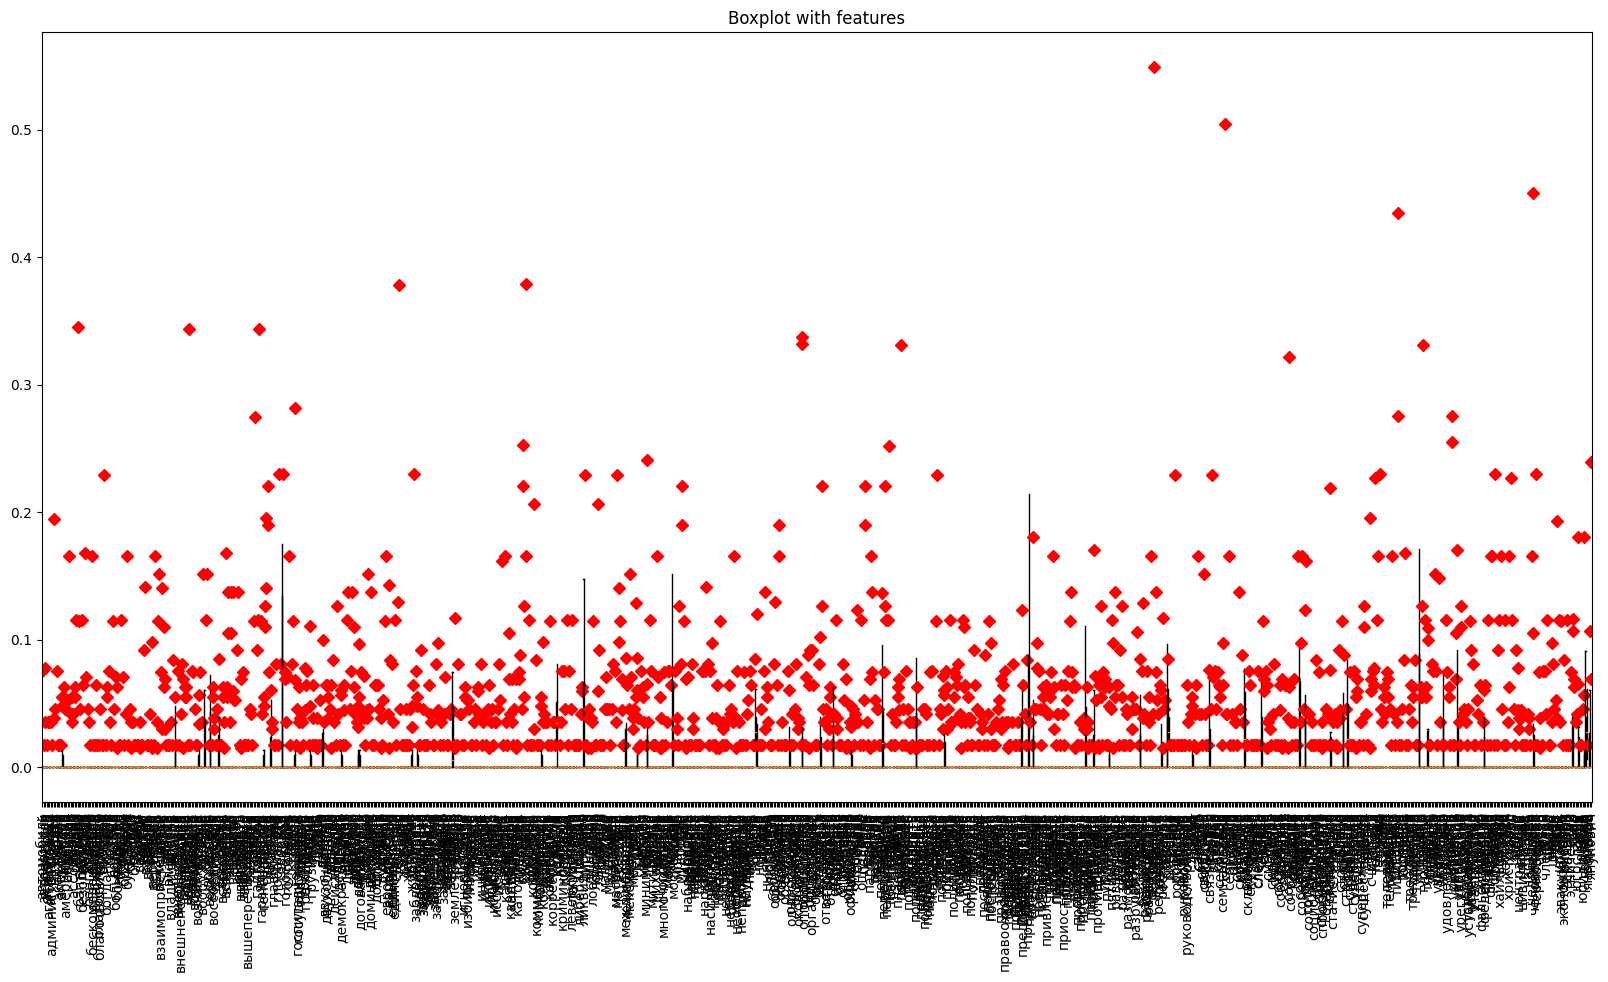

In [ ]:
import matplotlib.pyplot as plt

features = list(df_vector.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df_vector.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [ ]:
#df_vector = (df_vector-df_vector.min())/(df_vector.max()-df_vector.min())
#df_vector

In [ ]:
df_vector_tr = df_vector.transpose()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='num_clusters', ylabel='distortions'>

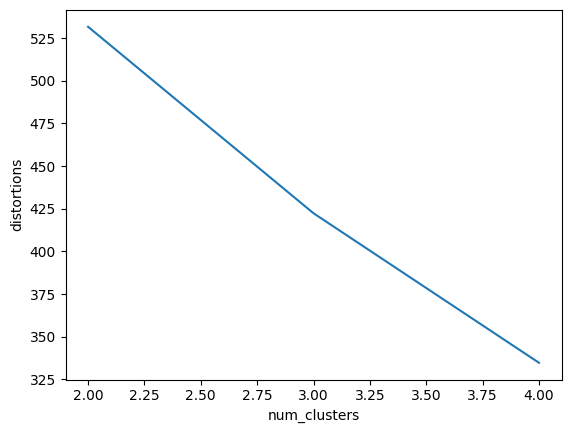

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

distortions = []
num_clusters = range(2, 5)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(preprocessing.normalize(df_vector_tr)) # preprocessing.normalize
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(preprocessing.normalize(bow))#
# store cluster labels in a variable
clusters = kmeans.labels_

# Выводим межкластерное расстояния
distances_euclidean = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
distances_cosine = pairwise_distances(kmeans.cluster_centers_, metric='cosine')
print(distances_euclidean)
print('************************************************************************')
print(distances_cosine)

[[0.         0.94918566 0.87644272]
 [0.94918566 0.         0.81426282]
 [0.87644272 0.81426282 0.        ]]
************************************************************************
[[0.         0.91956627 0.94833993]
 [0.91956627 0.         0.89634185]
 [0.94833993 0.89634185 0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

distances = 1 - cosine_similarity(bow) #preprocessing.normalize()

clustering = AgglomerativeClustering(n_clusters = None, affinity='precomputed', linkage='complete', distance_threshold = 0.97 ).fit(distances) # affinity='precomputed',  distance_threshold = 0.21 
 
clusters = clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
tri_dists = distances_euclidean[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print(f'Inter-cluster distance euclidean: max = {max_dist}, avg = {avg_dist}, min = {min_dist}')
tri_dists = distances_cosine[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print(f'Inter-cluster distance cosine: max = {max_dist}, avg = {avg_dist}, min = {min_dist}')

Inter-cluster distance euclidean: max = 0.9491856641475243, avg = 0.8799637356259624, min = 0.8142628203675709
Inter-cluster distance cosine: max = 0.9483399282059282, avg = 0.9214160139709184, min = 0.8963418461767746


In [ ]:
# import numpy as np
# from sklearn.metrics.pairwise import euclidean_distances

# dists = euclidean_distances(kmeans.cluster_centers_)

# tri_dists = dists[np.triu_indices(3, 1)]
# max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
# print(max_dist, avg_dist, min_dist)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(preprocessing.normalize(bow.toarray())) # 
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
x0 

array([-0.18602732, -0.21100744, -0.21648582, -0.17288235, -0.18100314,
       -0.15779209,  0.74315756, -0.17994405,  0.74388079, -0.18189613])

In [ ]:
x1

array([-0.12167484,  0.60901455,  0.62275476, -0.15122276, -0.28118664,
       -0.18042462,  0.02841124, -0.27170108,  0.02050067, -0.27447128])

In [ ]:
# assign clusters and pca vectors to our dataframe 
df_vector['cluster'] = clusters
df_vector['x0'] = x0
df_vector['x1'] = x1
df_vector

автомобиль  автономный  агентство  агитаторша  агитационный  агитация  агитировать  административный     адрес    айдахо       акт  активный  актуальный  александра   алексей       али   америка  американский  аналитик   андрей    апрель    аспект  ассоциация      афин   бавария    байера    баллон  баптистский  бастианс  безопасность   белград     белый   бельрив  бенгальский     берет   беррер  бескомпромиссный   билборд  благодарный  благодаря  благосклонность  благотворительный   близкий      блок   бобылев       бог  богдановский    боевой       бой    бойкий      бокс   больший  большинство   большой  бондаренко     борец  боруссия    борьба    бразды  браммерц     брат  буквально     букет    бывший    быстро       бют   бютовец     вадим     важно    важный    вакуум     валко   варгас   вариант     вдоль   ведущий    венсан    вернее  вернуться  верующий     верх      весь     вечер  вечеринка  взаимоприемлемый     взять     визит    виктор    висеть      витя  владимир  владимировна    власов    власть    вместе       вне  внедорожник  внеочередной  внешнеполитический   вносить  внутренний  вовлекать   военный  возглавлять  возгорание  возликовать  возмездие  возможно  возможность  возможный  возникновение   возраст      воля    вообще  вооруженный    вопрос       вор  ворваться    восемь  воскресение  воскресный  воссоединение    восток  восточный      врач     время      вряд  вскорости  встречаться  вступать  вступление  вторжение    второй  выбирать     выбор    выборы   вывести  выводить    вывоз  вывозить  выглядеть  выигрывать  выражать  выражение     выход  выходить  вышеперечисленный  выяснять     гаага   газетка   газовый    гаити  гаитянский   гамбург     гараж  гаражный  гарантировать  генеральный    генсек  германия        ги  гибкость     глава   главный  главпочтамт      глаз   гласить  глобальный        го  говорить       год       гол     голос  голосование  голосовать  голубев     гонка       гоп    гореть     город  горшенин  госпитализировать  государственный  государство   готовый    градус  гражданин  гражданство   граница    график     греко  грузинский    группа     гузар    гулять    давать     давно      дама    данные    данный      дата  двузональный  двухобщинный        де   девочка   девушка     дежер  действие  действующий   декабрь  делегация    делить      дело  демократический      день   депутат  дердийок   деревня  десятеро    десять   детский  димитрис  дипломат  директор  добавлять  добиваться  договариваться    доклад  документ    должно   должный       дом  домашние  доминиканский  допускать    дорога  достигать  достижение  доходить      дочь    думать   духовно  духовный   евгений     евро  еврокомиссия  европейский  евросоюз  единогласно  единодушный  единственный  единство   единый        ес       жан     ждать   желание    желать      жена   женщина   жесткий     живой     жизнь  журналист  забивать  заблокировать  заверять  зависимость    задача  задержанный  задерживать  задумываться  заказывать  заканчивать  закладывать  заключаться  закрытый       зам  заместитель  замминистра  замораживать     запад  западник  западный  запрещать  зарубежный  заседание  заставлять  затяжной    заявка  заявление  заявлять    здание  землетрясение    зимний     знать  значение      зона    зрение  игнорировать      идти  избиратель  избирательный  известный  изменять    именно     иметь   иметься     имидж       имя  инвестор  инициатива      иной  институт  интеграция  интервью  интернет  информация       иск  исключение  искусственно  исполнять  исследование  истощение      итог   кабинет    кабмин    каждый  казахстан  календарик  кампания  кандидат  кандидатский  кандидатура   карасев     кариб  касаться  католический      киев  киевский  километр      кипр   киприот  кипрский    кирилл  кисслинг     клюев  ключевой  количество   команда  комиссия  комментировать  коммунальщик  компания  компромисс     конец  конкуренция  контроль  конфликт  кончаться  кооператив  короткий  корреспо

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(bow.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster df_vector
    terms = tfidf.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
бобылев,штат,адрес,сообщать,гаити,возгорание,гараж,город,человек,ребенок

Cluster 1
гол,тайм,чемпионат,фрайбург,матч,становиться,турнир,победитель,германия,байера

Cluster 2
ес,соглашение,мун,ги,пан,год,кипр,сербия,кипрский,оон

Cluster 3
тур,выбор,второй,юлия,луценко,президент,министр,янукович,украина,тимошенко


In [ ]:
df_vector.iloc[:, -3:]

cluster        x0        x1
0        0 -0.213409 -0.202843
1        3 -0.282737  0.673363
2        3 -0.299266  0.633452
3        0 -0.178888 -0.180373
4        1 -0.197733 -0.387887
5        2 -0.020900 -0.174145
6        2  0.780560  0.075179
7        1 -0.184200 -0.241196
8        2  0.770100  0.092218
9        0 -0.173525 -0.287768

## 4) Отобразить результат на двумерной плоскости.

In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "other", 1: "tournament", 2: "united_nations", 3: "ukraine"}
# apply mapping
df_vector['cluster'] = df_vector['cluster'].map(cluster_map)

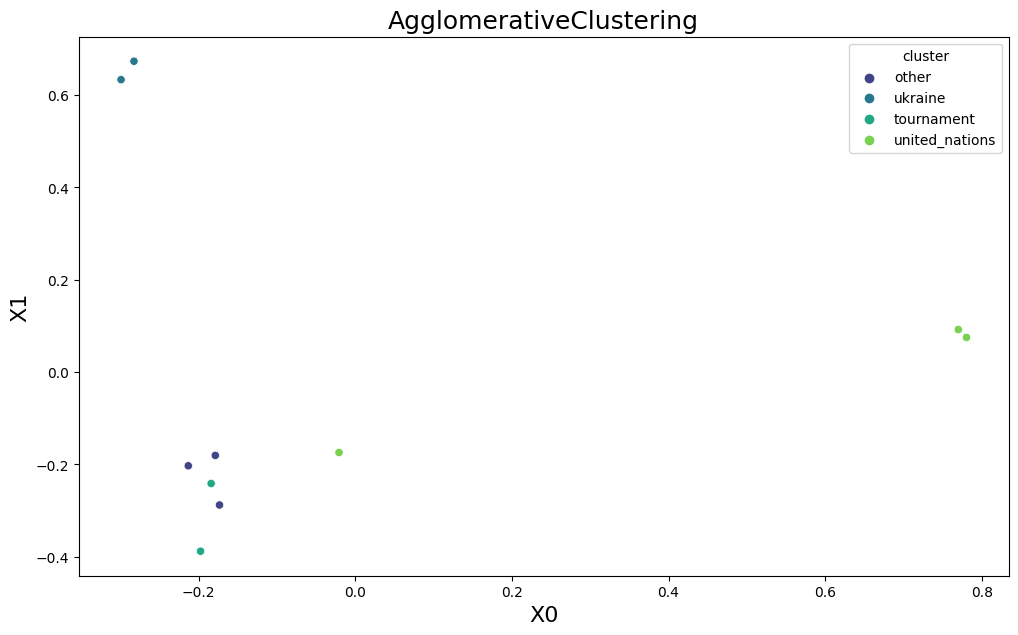

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("AgglomerativeClustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_vector, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

## 5) Для каждого кластера определить самые часто встречаемые слова (можно использовать CountVectorizer) и нарисовать соответствующее облако слов. Это даст нам приблизительное понимание тем, на которые разбилось множество текстов.

In [ ]:
df_vector.iloc[:, -3:]

cluster        x0        x1
0           other -0.213409 -0.202843
1         ukraine -0.282737  0.673363
2         ukraine -0.299266  0.633452
3           other -0.178888 -0.180373
4      tournament -0.197733 -0.387887
5  united_nations -0.020900 -0.174145
6  united_nations  0.780560  0.075179
7      tournament -0.184200 -0.241196
8  united_nations  0.770100  0.092218
9           other -0.173525 -0.287768

In [ ]:
df['cluster'] = df_vector['cluster'] 
df

text         cluster
0  'москва', 'янва', 'риа', 'новость', 'больший', 'часть', 'ребенок', 'который', 'гражданин', 'сша'...           other
1  'киев', 'янва', 'риа', 'новость', 'марина', 'шмаюн', 'премьер', 'министр', 'украина', 'кандидат'...         ukraine
2  'киев', 'янва', 'риа', 'новость', 'февраль', 'день', 'гражданин', 'украина', 'решать', 'близкий'...         ukraine
3  'мехико', 'янва', 'риа', 'новость', 'юрий', 'николаев', 'группа', 'вооруженный', 'человек', 'ноч...           other
4  'москва', 'янва', 'риа', 'новость', 'немецкий', 'теннисист', 'михаэль', 'беррер', 'становиться',...      tournament
5  'сараево', 'янва', 'риа', 'новость', 'юлия', 'петровский', 'переходный', 'торговый', 'соглашение...  united_nations
6  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...  united_nations
7  'москва', 'янва', 'риа', 'новость', 'леверкузенский', 'байера', 'счет', 'свой', 'поле', 'переигр...      tournament
8  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...  united_nations
9  'москва', 'янва', 'риа', 'новость', 'пожарный', 'удаваться', 'ликвидировать', 'возгорание', 'про...           other

In [ ]:
df_other= df[df.cluster == 'other']
lst_other = df_other['text'].tolist()
lst_other

["'москва', 'янва', 'риа', 'новость', 'больший', 'часть', 'ребенок', 'который', 'гражданин', 'сша', 'пытаться', 'вывозить', 'гаити', 'организованный', 'доминиканский', 'республика', 'приют', 'являться', 'сирота', 'сообщать', 'воскресение', 'агентство', 'франс', 'пресс', 'ссылка', 'заявление', 'представитель', 'международный', 'организация', 'детский', 'деревня', 'оказывать', 'помощь', 'ребенок', 'оставаться', 'родитель', 'заявлять', 'агентство', 'патрисия', 'варгас', 'курировать', 'программа', 'детский', 'деревня', 'центральный', 'америка', 'мексика', 'кариб', 'поговорить', 'ребенок', 'выяснять', 'родитель', 'многий', 'живой', 'некоторые', 'ребенок', 'смочь', 'называть', 'свой', 'домашние', 'адрес', 'номер', 'телефон', 'давать', 'возможность', 'связываться', 'родитель', 'это', 'воскресение', 'гаитянский', 'полиция', 'задерживать', 'десятеро', 'гражданин', 'сша', 'подозреваемый', 'попытка', 'разрешение', 'вывозить', 'ребенок', 'доминиканский', 'республика', 'представитель', 'баптистский

In [ ]:
df_united_nations= df[df.cluster == 'united_nations']
lst_united_nations = df_united_nations['text'].tolist()
lst_united_nations

["'сараево', 'янва', 'риа', 'новость', 'юлия', 'петровский', 'переходный', 'торговый', 'соглашение', 'сербия', 'евросоюз', 'ес', 'предусматривать', 'постепенный', 'либерализация', 'торговля', 'течение', 'шесть', 'год', 'открывать', 'путь', 'интеграция', 'белград', 'ес', 'официально', 'вступать', 'сила', 'февраль', 'год', 'сообщаться', 'сайт', 'европейский', 'комиссия', 'европейский', 'союз', 'размораживать', 'декабрь', 'год', 'переходный', 'торговый', 'соглашение', 'сербия', 'белград', 'начинать', 'односторонний', 'порядок', 'применять', 'документ', 'январь', 'год', 'полный', 'применение', 'сторона', 'переходный', 'соглашение', 'открывать', 'путь', 'вступление', 'сербия', 'ес', 'заявлять', 'глава', 'делегация', 'европейский', 'комиссия', 'сербия', 'венсан', 'дежер', 'слово', 'который', 'приводить', 'агентство', 'танюга', 'слово', 'дипломат', 'экономический', 'значение', 'переходный', 'соглашение', 'заключаться', 'сербия', 'становиться', 'привлекательный', 'страна', 'зарубежный', 'инвес

In [ ]:
df_ukraine= df[df.cluster == 'ukraine']
lst_ukraine = df_ukraine['text'].tolist()
lst_ukraine

["'киев', 'янва', 'риа', 'новость', 'марина', 'шмаюн', 'премьер', 'министр', 'украина', 'кандидат', 'президент', 'юлия', 'тимошенко', 'воскресение', 'прямой', 'эфир', 'украинский', 'телеканал', 'заявлять', 'случай', 'победа', 'выборы', 'президент', 'юрий', 'луценко', 'работать', 'команда', 'январь', 'украина', 'состояться', 'первый', 'тур', 'выбор', 'президент', 'итог', 'который', 'виктор', 'янукович', 'набирать', 'голос', 'премьер', 'министр', 'страна', 'юлия', 'тимошенко', 'оказываться', 'второй', 'место', 'результат', 'второй', 'тур', 'выбор', 'президент', 'украина', 'состояться', 'февраль', 'парламент', 'украина', 'инициатива', 'партия', 'регион', 'январь', 'отправлять', 'отставка', 'глава', 'мвд', 'юрий', 'луценко', 'однако', 'премьер', 'министр', 'юлия', 'тимошенко', 'вносить', 'кабмин', 'кандидатура', 'утверждение', 'первый', 'замминистра', 'внутренний', 'дело', 'полномочие', 'министр', 'правительство', 'единогласно', 'поддерживать', 'это', 'предложение', 'партия', 'регион', 'ос

In [ ]:
df_tournament = df[df.cluster == 'tournament']
lst_tournament= df_tournament['text'].tolist()
lst_tournament

["'москва', 'янва', 'риа', 'новость', 'немецкий', 'теннисист', 'михаэль', 'беррер', 'становиться', 'победитель', 'турнир', 'серия', 'челленджер', 'хайльбронне', 'германия', 'призовой', 'фонд', 'который', 'составлять', 'тысяча', 'евро', 'финальный', 'матч', 'взять', 'верх', 'представитель', 'казахстан', 'андрей', 'голубев', 'победитель', 'парный', 'соревнование', 'турнир', 'становиться', 'брат', 'санчать', 'сончить', 'ративатать', 'таиланд'",
 "'москва', 'янва', 'риа', 'новость', 'леверкузенский', 'байера', 'счет', 'свой', 'поле', 'переигрывать', 'фрайбург', 'матч', 'го', 'тур', 'чемпионат', 'германия', 'футбол', 'вернуться', 'первый', 'место', 'турнирный', 'таблица', 'перерыв', 'счет', 'крупный', 'ударный', 'байера', 'становиться', 'пятиминутка', 'конец', 'первый', 'тайм', 'который', 'забивать', 'гол', 'хозяин', 'отличаться', 'штефан', 'кисслинг', 'минута', 'эрен', 'дердийок', 'сам', 'хююпя', 'вор', 'тайм', 'единственный', 'гол', 'фрайбург', 'забивать', 'феликс', 'бастианс', 'положение

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

def get_frequencies(list_words):
    # fit and transform the data using CountVectorizer
    X = vectorizer.fit_transform(list_words).toarray()

    # get the feature names
    features = vectorizer.get_feature_names_out()

    # create a DataFrame from the bag of words representation
    df_bow = pd.DataFrame(X, columns=features)

    df_bow = df_bow.transpose()
    df_bow['sum'] = df_bow.sum(axis=1)
    df_bow = df_bow.sort_values(by='sum', ascending=False)
    return df_bow 

df_bow_ukraine = get_frequencies(lst_ukraine)
df_bow_ukraine[:15]

0   1  sum
тимошенко   4  29   33
украина     4  17   21
янукович    1  16   17
это         2  10   12
тур         2   9   11
страна      1   8    9
второй      2   7    9
министр     4   5    9
выбор       2   7    9
президент   4   5    9
человек     0   8    8
народ       0   8    8
украинский  1   7    8
кандидат    1   7    8
юлия        3   5    8

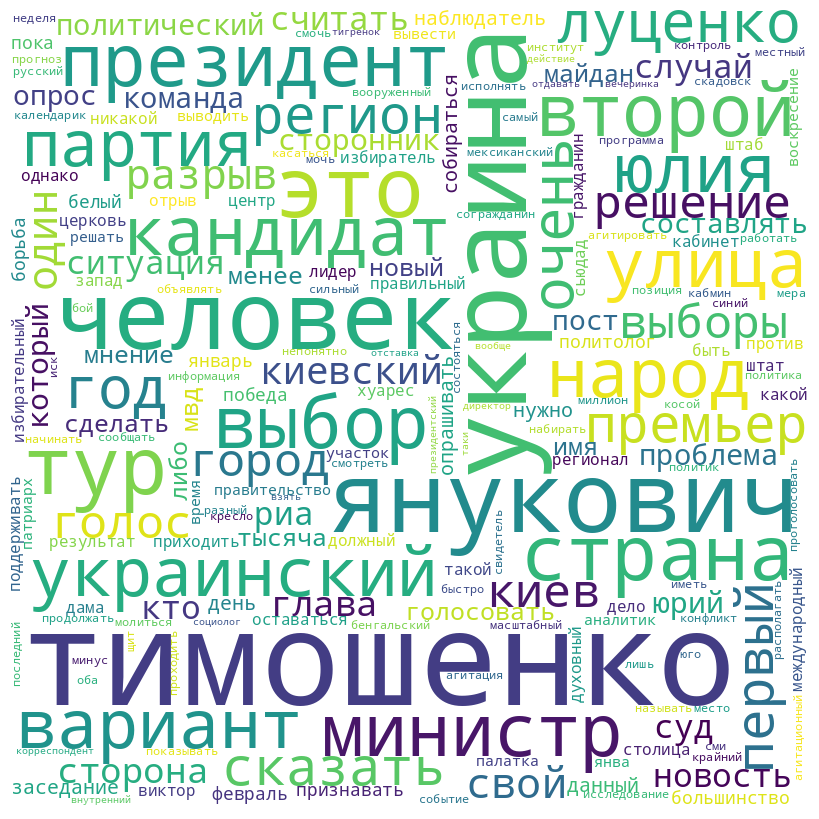

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dict_ukrain = df_bow_ukrain['sum'].to_dict()

def word_cloud(frequencies):
    # создаем облако слов
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate_from_frequencies(frequencies)

    # отображаем облако слов
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

word_cloud(dict_ukrain)

In [ ]:
df_bow_tournament = get_frequencies(lst_tournament)
df_bow_tournament[:15]

0  1  sum
становиться  2  1    3
байера       0  3    3
германия     1  2    3
победитель   2  0    2
матч         1  1    2
москва       1  1    2
новость      1  1    2
первый       0  2    2
риа          1  1    2
счет         0  2    2
забивать     0  2    2
тайм         0  2    2
тур          0  2    2
турнир       2  0    2
фрайбург     0  2    2

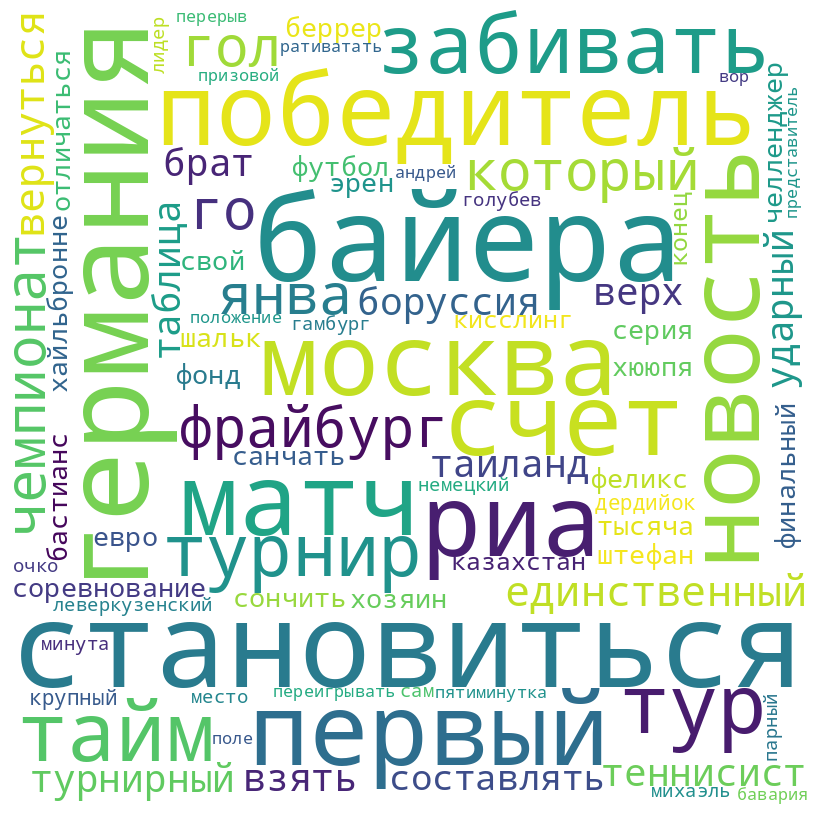

In [ ]:
dict_tournament = df_bow_tournament['sum'].to_dict()

word_cloud(dict_tournament)

In [ ]:
df_bow_united_nations = get_frequencies(lst_united_nations)
df_bow_united_nations[:15]

0  1  2  sum
оон          1  6  7   14
год          7  3  4   14
сербия      12  0  0   12
соглашение   9  1  0   10
ес           9  0  0    9
кипрский     0  6  3    9
кипр         0  4  4    8
мун          0  3  4    7
пан          0  3  4    7
ги           0  3  4    7
лидер        0  3  3    6
община       0  3  3    6
остров       0  2  4    6
прогресс     2  2  2    6
переходный   6  0  0    6

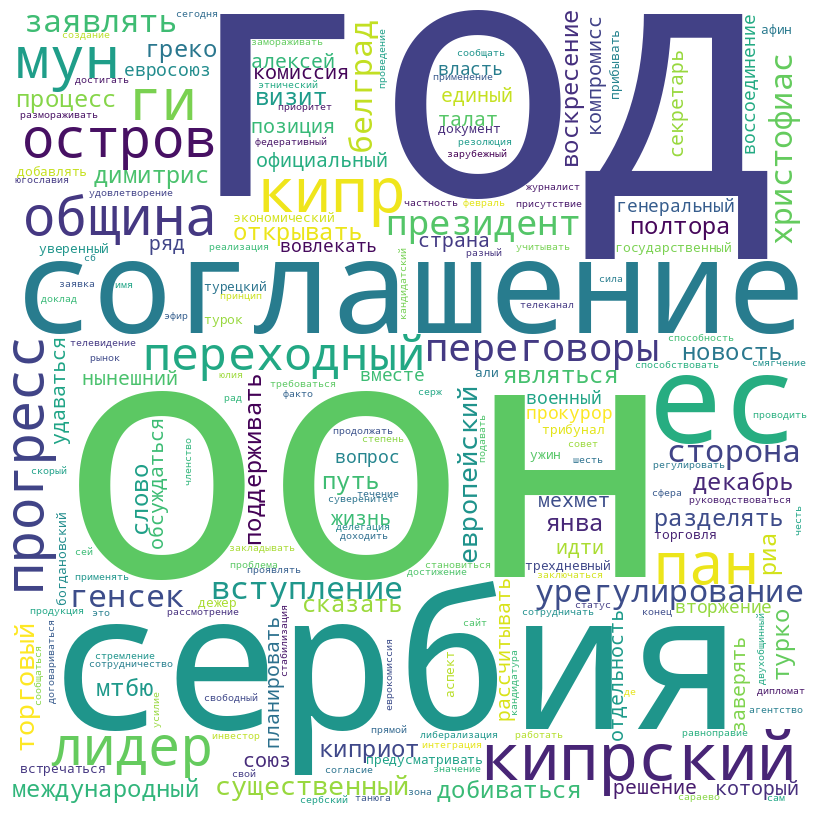

In [ ]:
dict_united_nations= df_bow_united_nations['sum'].to_dict()

word_cloud(dict_united_nations)

In [ ]:
df_bow_other = get_frequencies(lst_other)
df_bow_other[:25] 

0  1  2  sum
ребенок        12  0  0   12
человек         1  8  0    9
город           2  5  0    7
сообщать        3  2  1    6
гаити           6  0  0    6
родитель        5  0  0    5
который         4  0  1    5
воскресение     2  1  1    4
новость         1  1  2    4
риа             1  1  2    4
штат            1  3  0    4
ранее           1  1  1    3
республика      3  0  0    3
вывозить        3  0  0    3
москва          1  0  2    3
располагать     1  2  0    3
гараж           0  0  3    3
деревня         3  0  0    3
год             0  3  0    3
приют           3  0  0    3
пресс           2  0  1    3
представитель   2  1  0    3
оставаться      3  0  0    3
происходить     1  0  2    3
данный          1  2  0    3

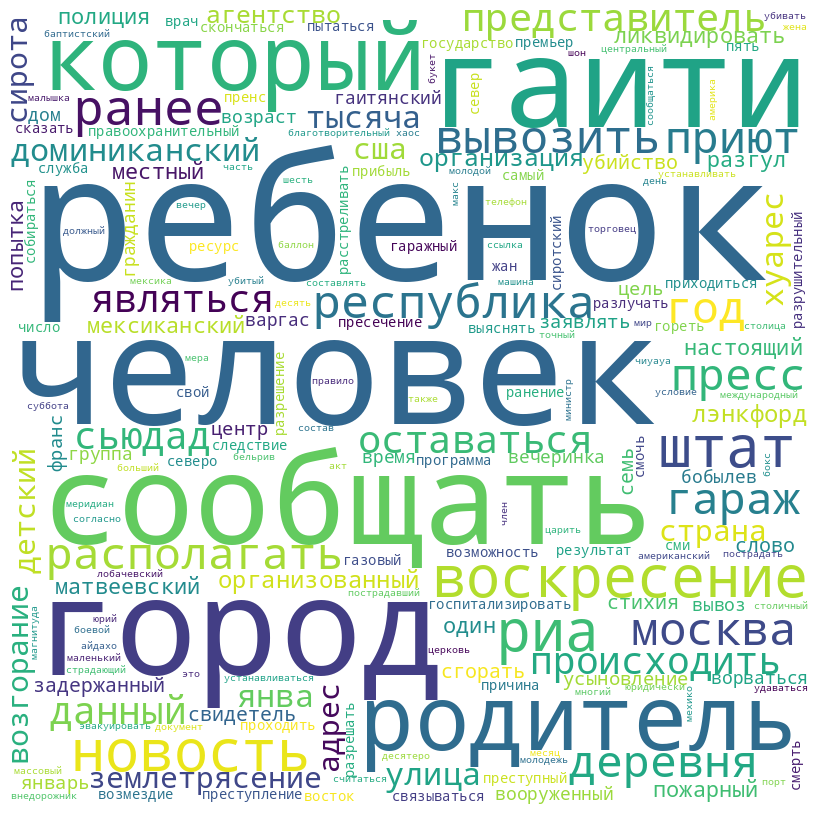

In [ ]:
dict_other= df_bow_other['sum'].to_dict()

word_cloud(dict_other)

## 6) Кластеризовать тексты, используя вложения, полученные с помощью OpenAI ada-embeddings (датасет с этими вложениями уже сохранен и лежит рядом с этим ноутбуком). Насколько отличается подход, использующий текстовые вложения, от подхода с векторами TF-IDF? Что работает лучше?

In [ ]:
df_news_emb = pd.read_json('news_emb.json')
len(df_news_emb['ada_embedding'][2])

1536

In [ ]:
df_news_emb

text                                                                   title                                                                                        ada_embedding
0  <p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> большая часть из 33 ...    большинство детей, которых пытались увезти в сша из гаити, не сироты  [-0.017811846000000003, 0.0182827022, -0.023475581800000003, -0.025211026900000003, -0.021686326...
1  <p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости, марина шмаюн.</strong> премьер-...  луценко будет работать в команде тимошенко, если она победит в выборах  [-0.0171592012, -0.0136338864, -0.0148223443, -0.0167185366, -0.026306323700000002, -0.011517362...
2  <p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости.</strong> до <a href="http://www...                    "лютые" выборы: есть ли вероятность второго майдана?  [-0.022192403700000002, -0.0024306285, -0.0058014998, -0.022192403700000002, -0.0136301909, -0.0...
3  <p><strong></strong></p>\n<p><strong>мехико, 31 янв - риа новости, юрий николаев.</strong> групп...  жертвами бойни на севере мексики стали 13 молодых людей, еще 20 ранены  [-0.0037757503, 0.0049913246, -0.0197887346, -0.0347151719, -0.014926437300000001, 0.0080404468,...
4  <p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> немецкий теннисист м...                немец беррер выиграл теннисный турнир на родине           [-0.0152442101, -0.0026524661, -0.0097467331, -0.0189623106, -0.0018275125, 0.0230920557, -0.019...
5  <p><strong></strong></p>\n<p><strong>сараево, 31 янв - риа новости, юлия петровская.</strong> пе...    переходное торговое соглашение сербии с ес вступает в силу 1 февраля  [-0.0052304403, -0.0165115874, -0.0109191667, -0.0311900284, -0.015249639700000001, -0.004968088...
6  <p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...                  генсек оон уверен в успехе мирных переговоров на кипре  [-0.0063806246, -0.0035551162, -0.00035275840000000003, -0.0401146524, -0.0123000825, 0.00146523...
7  <p><strong>москва, 31 янв &ndash; риа новости. </strong>леверкузенский "байер" со счетом 3:1 на ...       "байер" вернулся в лидеры чемпионата германии по футболу           [-0.0087666642, -0.0054472806, -0.0148348613, -0.0310927946, -0.0215071924, 0.0096057402, -0.037...
8  <p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...              генсек оон прибыл на кипр, чтобы помочь мирным переговорам  [-0.009484864800000001, -0.0055715051000000005, -0.007765306600000001, -0.0329718478, 0.00400889...
9  <p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> пожарным удалось лик...              ликвидирован пожар в гаражном кооперативе на западе москвы  [-0.0260355882, 0.0002685086, -0.022970235000000002, -0.0418798737, -0.024947453300000002, 0.000...

In [ ]:
df_news_emb.drop('text', axis=1, inplace=True)
df_news_emb.drop('title', axis=1, inplace=True)
df_news_emb

ada_embedding
0  [-0.017811846000000003, 0.0182827022, -0.023475581800000003, -0.025211026900000003, -0.021686326...
1  [-0.0171592012, -0.0136338864, -0.0148223443, -0.0167185366, -0.026306323700000002, -0.011517362...
2  [-0.022192403700000002, -0.0024306285, -0.0058014998, -0.022192403700000002, -0.0136301909, -0.0...
3  [-0.0037757503, 0.0049913246, -0.0197887346, -0.0347151719, -0.014926437300000001, 0.0080404468,...
4  [-0.0152442101, -0.0026524661, -0.0097467331, -0.0189623106, -0.0018275125, 0.0230920557, -0.019...
5  [-0.0052304403, -0.0165115874, -0.0109191667, -0.0311900284, -0.015249639700000001, -0.004968088...
6  [-0.0063806246, -0.0035551162, -0.00035275840000000003, -0.0401146524, -0.0123000825, 0.00146523...
7  [-0.0087666642, -0.0054472806, -0.0148348613, -0.0310927946, -0.0215071924, 0.0096057402, -0.037...
8  [-0.009484864800000001, -0.0055715051000000005, -0.007765306600000001, -0.0329718478, 0.00400889...
9  [-0.0260355882, 0.0002685086, -0.022970235000000002, -0.0418798737, -0.024947453300000002, 0.000...

In [ ]:
list_news_emb = df_news_emb['ada_embedding'].tolist()
list_news_emb

[[-0.017811846000000003,
  0.0182827022,
  -0.023475581800000003,
  -0.025211026900000003,
  -0.0216863267,
  0.01501361,
  -0.0180270951,
  -0.0022718848,
  -0.013769202900000001,
  -0.0422964059,
  0.0104530239,
  0.0218612161,
  -0.0214979835,
  0.000692412,
  0.0073991804,
  0.0095314896,
  0.021632513000000003,
  -0.0322066136,
  0.0143275047,
  0.0067668869000000005,
  -0.0005477916,
  0.0024551826,
  -0.0268522985,
  0.0032270518,
  -0.0042646187,
  0.023932986,
  0.0238388143,
  -0.0036928637,
  0.0127938557,
  -0.0109844198,
  0.00420408,
  -0.0262872707,
  -0.014004631,
  -0.0069215973,
  -0.024672905000000002,
  -0.0071368460000000005,
  0.0207849704,
  -0.033955514400000004,
  0.0255338997,
  -0.0233006924,
  0.0200585052,
  -0.0055762916,
  -0.0014596565,
  -0.0055527487,
  -0.0254128221,
  0.0247805286,
  -0.0162109323,
  -0.0229912717,
  -0.0111324033,
  0.0275384057,
  0.014663830400000001,
  0.0324218646,
  -0.0382335857,
  -0.020717706500000002,
  -0.0229240078,
  -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='num_clusters', ylabel='distortions'>

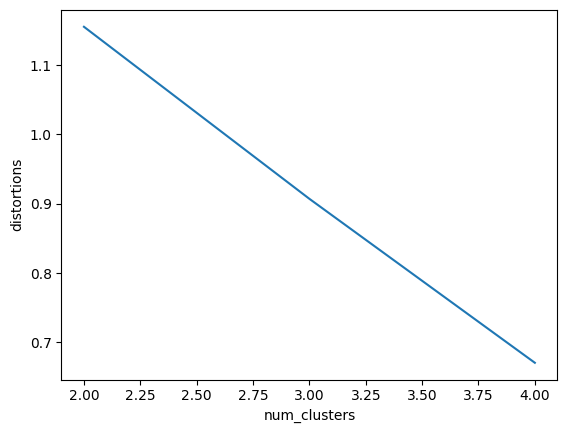

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

distortions = []
num_clusters = range(2, 5)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(preprocessing.normalize(list_news_emb)) # preprocessing.normalize
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [ ]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(preprocessing.normalize(list_news_emb))
# store cluster labels in a variable
clusters = kmeans.labels_

# Выводим межкластерное расстояния
distances_euclidean = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
distances_cosine = pairwise_distances(kmeans.cluster_centers_, metric='cosine')
print(distances_euclidean)
print('************************************************************************')
print(distances_cosine)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.         0.40687288 0.39966143]
 [0.40687288 0.         0.4067794 ]
 [0.39966143 0.4067794  0.        ]]
************************************************************************
[[0.         0.09060142 0.08789176]
 [0.09060142 0.         0.09157411]
 [0.08789176 0.09157411 0.        ]]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

distances = 1 - cosine_similarity(list_news_emb) #preprocessing.normalize()

clustering = AgglomerativeClustering(n_clusters = None, affinity='precomputed', linkage='complete', distance_threshold = 0.17 ).fit(distances) # affinity='precomputed',  distance_threshold = 0.21 
 
clusters = clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
tri_dists = distances_euclidean[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print(f'Inter-cluster distance euclidean: max = {max_dist}, avg = {avg_dist}, min = {min_dist}')
tri_dists = distances_cosine[np.triu_indices(3, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print(f'Inter-cluster distance cosine: max = {max_dist}, avg = {avg_dist}, min = {min_dist}')

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(preprocessing.normalize(list_news_emb))
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
x0

array([-0.05381775,  0.06335163,  0.070352  , -0.15994071, -0.17408248,
        0.03293895,  0.31046862, -0.18527455,  0.2948281 , -0.19882382])

In [ ]:
x1

array([-1.87803861e-01,  1.78380706e-02, -2.10181655e-02, -2.38755995e-01,
        2.43921493e-01,  1.33265735e-01, -1.12917650e-04,  2.27559128e-01,
       -4.96215533e-03, -1.69931331e-01])

In [ ]:
# assign clusters and pca vectors to our dataframe 
df_news_emb['cluster'] = clusters
df_news_emb['x0'] = x0
df_news_emb['x1'] = x1
df_news_emb

ada_embedding  cluster        x0        x1
0  [-0.017811846000000003, 0.0182827022, -0.023475581800000003, -0.025211026900000003, -0.021686326...        1 -0.053818 -0.187804
1  [-0.0171592012, -0.0136338864, -0.0148223443, -0.0167185366, -0.026306323700000002, -0.011517362...        0  0.063352  0.017838
2  [-0.022192403700000002, -0.0024306285, -0.0058014998, -0.022192403700000002, -0.0136301909, -0.0...        0  0.070352 -0.021018
3  [-0.0037757503, 0.0049913246, -0.0197887346, -0.0347151719, -0.014926437300000001, 0.0080404468,...        1 -0.159941 -0.238756
4  [-0.0152442101, -0.0026524661, -0.0097467331, -0.0189623106, -0.0018275125, 0.0230920557, -0.019...        3 -0.174082  0.243921
5  [-0.0052304403, -0.0165115874, -0.0109191667, -0.0311900284, -0.015249639700000001, -0.004968088...        2  0.032939  0.133266
6  [-0.0063806246, -0.0035551162, -0.00035275840000000003, -0.0401146524, -0.0123000825, 0.00146523...        0  0.310469 -0.000113
7  [-0.0087666642, -0.0054472806, -0.0148348613, -0.0310927946, -0.0215071924, 0.0096057402, -0.037...        3 -0.185275  0.227559
8  [-0.009484864800000001, -0.0055715051000000005, -0.007765306600000001, -0.0329718478, 0.00400889...        0  0.294828 -0.004962
9  [-0.0260355882, 0.0002685086, -0.022970235000000002, -0.0418798737, -0.024947453300000002, 0.000...        1 -0.198824 -0.169931

In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "0", 1: "1", 2: "2", 3: "3"}
# apply mapping
df_news_emb['cluster'] = df_news_emb['cluster'].map(cluster_map)

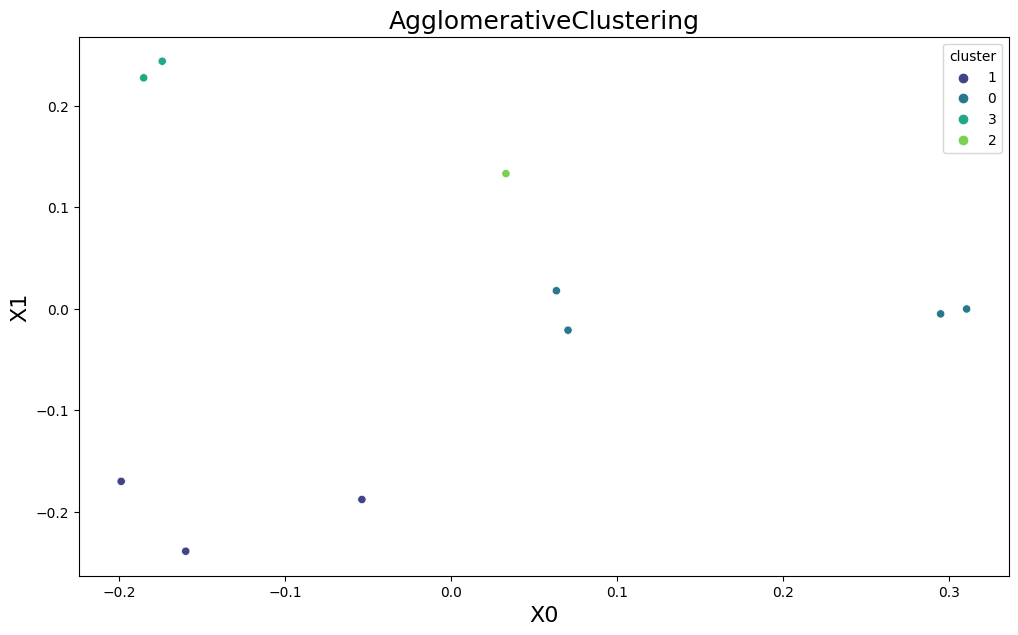

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("AgglomerativeClustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_news_emb, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

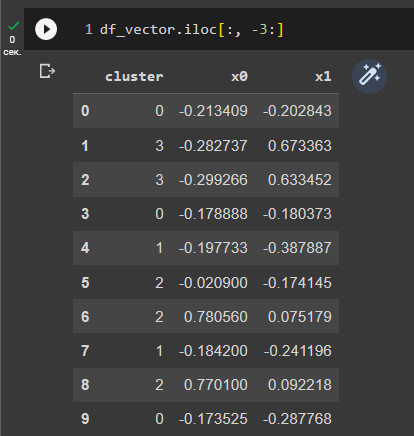

In [ ]:
df_news_emb.iloc[:, -3:]

cluster        x0        x1
0       1 -0.053818 -0.187804
1       0  0.063352  0.017838
2       0  0.070352 -0.021018
3       1 -0.159941 -0.238756
4       3 -0.174082  0.243921
5       2  0.032939  0.133266
6       0  0.310469 -0.000113
7       3 -0.185275  0.227559
8       0  0.294828 -0.004962
9       1 -0.198824 -0.169931

In [ ]:
df['cluster']  = df_news_emb['cluster'] 
df

text cluster
0  'москва', 'янва', 'риа', 'новость', 'больший', 'часть', 'ребенок', 'который', 'гражданин', 'сша'...       1
1  'киев', 'янва', 'риа', 'новость', 'марина', 'шмаюн', 'премьер', 'министр', 'украина', 'кандидат'...       0
2  'киев', 'янва', 'риа', 'новость', 'февраль', 'день', 'гражданин', 'украина', 'решать', 'близкий'...       0
3  'мехико', 'янва', 'риа', 'новость', 'юрий', 'николаев', 'группа', 'вооруженный', 'человек', 'ноч...       1
4  'москва', 'янва', 'риа', 'новость', 'немецкий', 'теннисист', 'михаэль', 'беррер', 'становиться',...       3
5  'сараево', 'янва', 'риа', 'новость', 'юлия', 'петровский', 'переходный', 'торговый', 'соглашение...       2
6  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...       0
7  'москва', 'янва', 'риа', 'новость', 'леверкузенский', 'байера', 'счет', 'свой', 'поле', 'переигр...       3
8  'афин', 'янва', 'риа', 'новость', 'алексей', 'богдановский', 'генеральный', 'секретарь', 'оон', ...       0
9  'москва', 'янва', 'риа', 'новость', 'пожарный', 'удаваться', 'ликвидировать', 'возгорание', 'про...       1

In [ ]:
df_0 = df[df.cluster == '0']
lst_0 = df_0['text'].tolist()

df_1 = df[df.cluster == '1']
lst_1 = df_1['text'].tolist()

df_2 = df[df.cluster == '2']
lst_2 = df_2['text'].tolist()

df_3 = df[df.cluster == '3']
lst_3 = df_3['text'].tolist()

In [ ]:
df_bow_0 = get_frequencies(lst_0)
df_bow_0[:15]

0   1  2  3  sum
тимошенко  4  29  0  0   33
украина    4  17  0  0   21
янукович   1  16  0  0   17
президент  4   5  2  3   14
это        2  10  0  1   13
оон        0   0  6  7   13
тур        2   9  0  0   11
год        0   4  3  4   11
сказать    1   6  1  2   10
второй     2   7  0  0    9
лидер      0   3  3  3    9
страна     1   8  0  0    9
министр    4   5  0  0    9
кипрский   0   0  6  3    9
выбор      2   7  0  0    9

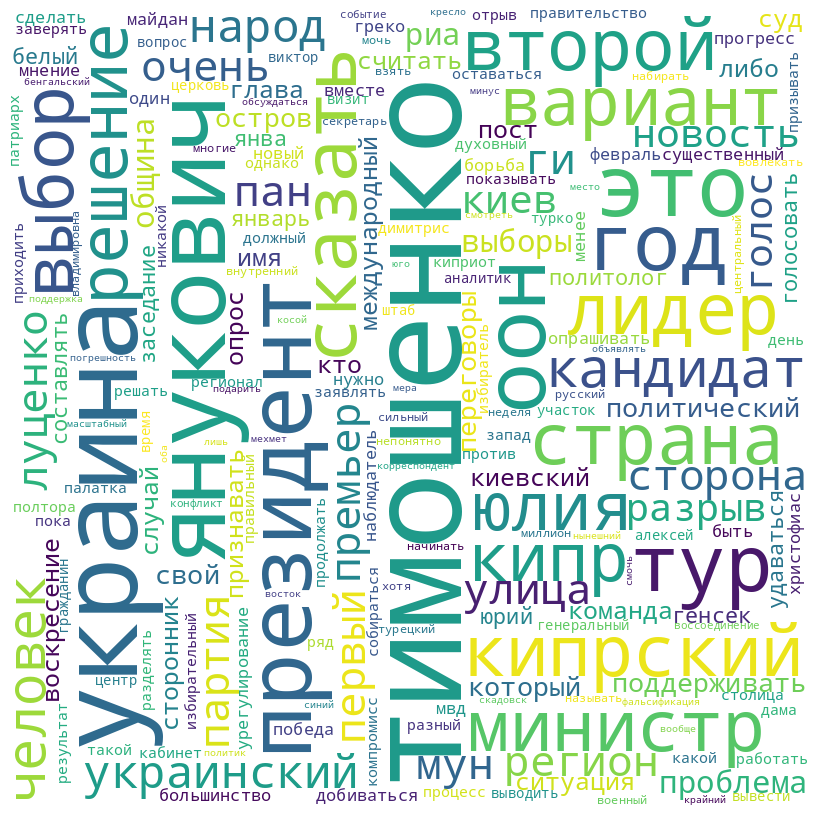

In [ ]:
dict_0 = df_bow_0['sum'].to_dict()

word_cloud(dict_0)

In [ ]:
df_bow_1 = get_frequencies(lst_1)
df_bow_1[:15]

0  1  2  sum
ребенок      12  0  0   12
человек       1  8  0    9
город         2  5  0    7
сообщать      3  2  1    6
гаити         6  0  0    6
родитель      5  0  0    5
который       4  0  1    5
воскресение   2  1  1    4
новость       1  1  2    4
риа           1  1  2    4
штат          1  3  0    4
ранее         1  1  1    3
республика    3  0  0    3
вывозить      3  0  0    3
москва        1  0  2    3

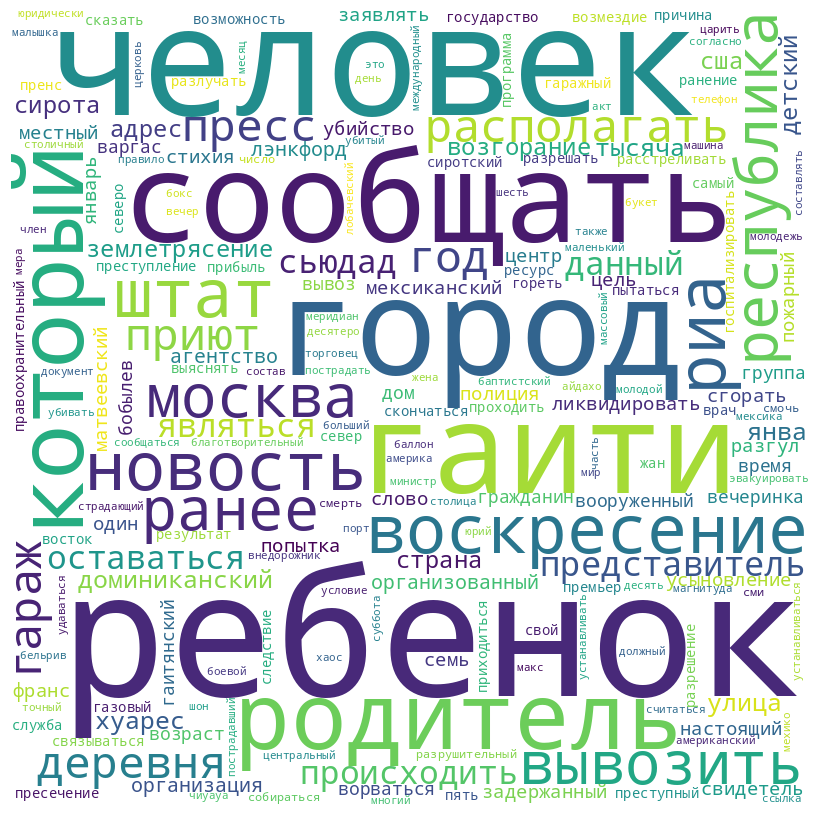

In [ ]:
dict_1 = df_bow_1['sum'].to_dict()

word_cloud(dict_1)

In [ ]:
df_bow_2 = get_frequencies(lst_2)
df_bow_2[:15]

0  sum
сербия       12   12
соглашение    9    9
ес            9    9
год           7    7
переходный    6    6
белград       4    4
европейский   4    4
вступление    4    4
торговый      4    4
заявлять      3    3
декабрь       3    3
мтбю          3    3
союз          2    2
открывать     2    2
комиссия      2    2

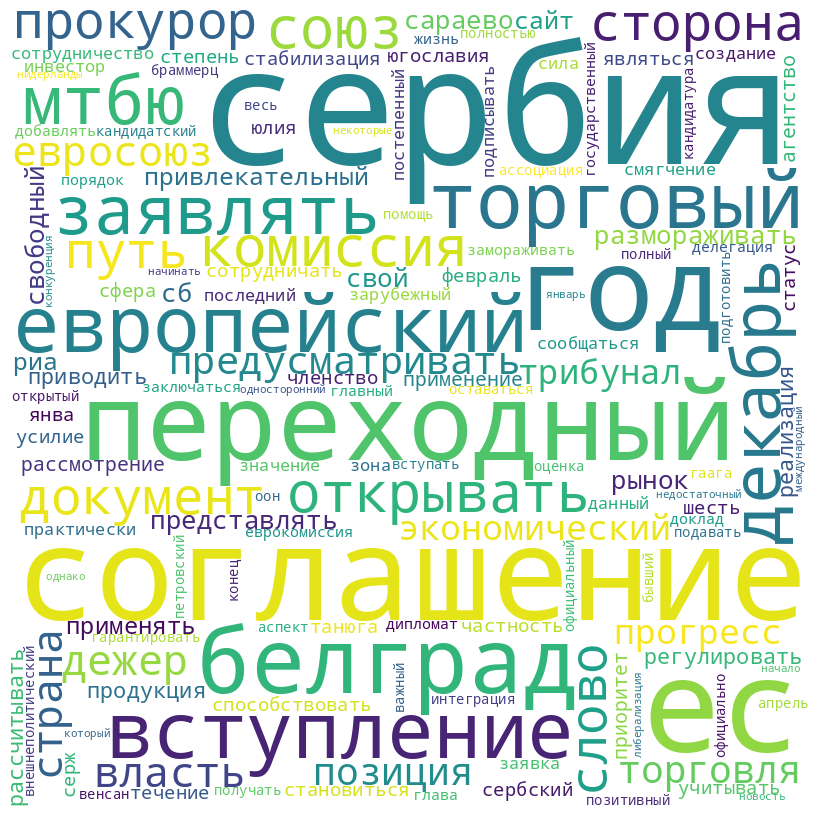

In [ ]:
dict_2 = df_bow_2['sum'].to_dict()

word_cloud(dict_2)

In [ ]:
df_bow_3 = get_frequencies(lst_3)
df_bow_3[:15]

0  1  sum
становиться  2  1    3
байера       0  3    3
германия     1  2    3
победитель   2  0    2
матч         1  1    2
москва       1  1    2
новость      1  1    2
первый       0  2    2
риа          1  1    2
счет         0  2    2
забивать     0  2    2
тайм         0  2    2
тур          0  2    2
турнир       2  0    2
фрайбург     0  2    2

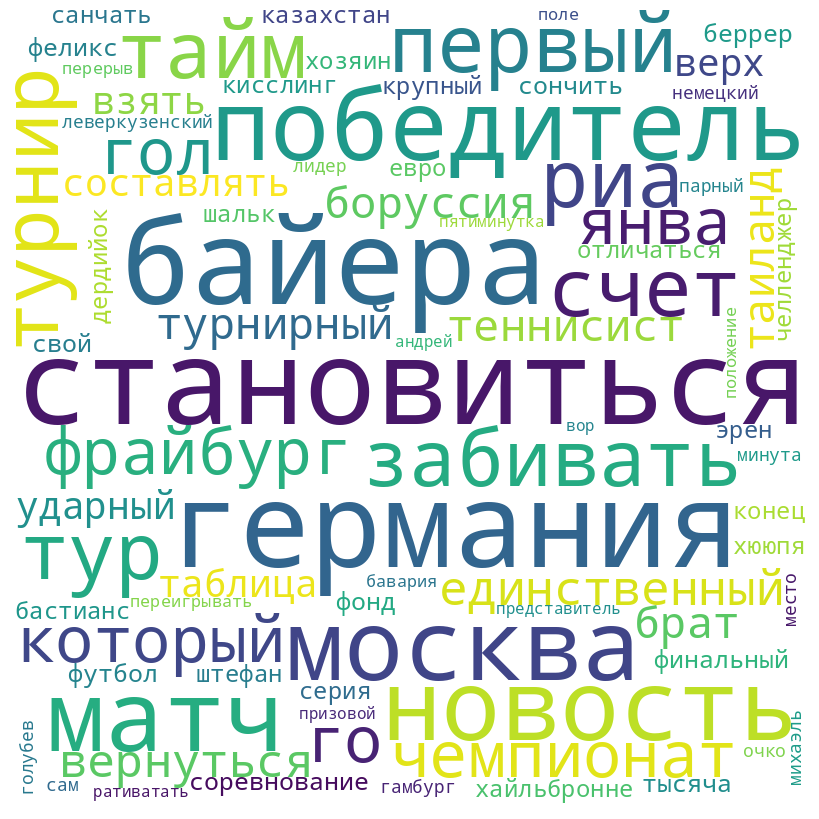

In [ ]:
dict_3 = df_bow_3['sum'].to_dict()

word_cloud(dict_3)

## Кластеризация на основе вектора TF-IDF работает лучше

## 7) На множестве преобразованных после п. 1. текстов обучить word2vec-модель (подумайте, какие гиперпараметры были бы оптимальными!)

In [ ]:
import json

# Читаем список из файла в формате JSON
with open('lst_true.json', 'r') as f:
    lst = json.load(f)

lst

[['москва',
  'янва',
  'риа',
  'новость',
  'больший',
  'часть',
  'ребенок',
  'который',
  'гражданин',
  'сша',
  'пытаться',
  'вывозить',
  'гаити',
  'организованный',
  'доминиканский',
  'республика',
  'приют',
  'являться',
  'сирота',
  'сообщать',
  'воскресение',
  'агентство',
  'франс',
  'пресс',
  'ссылка',
  'заявление',
  'представитель',
  'международный',
  'организация',
  'детский',
  'деревня',
  'оказывать',
  'помощь',
  'ребенок',
  'оставаться',
  'родитель',
  'заявлять',
  'агентство',
  'патрисия',
  'варгас',
  'курировать',
  'программа',
  'детский',
  'деревня',
  'центральный',
  'америка',
  'мексика',
  'кариб',
  'поговорить',
  'ребенок',
  'выяснять',
  'родитель',
  'многий',
  'живой',
  'некоторые',
  'ребенок',
  'смочь',
  'называть',
  'свой',
  'домашние',
  'адрес',
  'номер',
  'телефон',
  'давать',
  'возможность',
  'связываться',
  'родитель',
  'это',
  'воскресение',
  'гаитянский',
  'полиция',
  'задерживать',
  'десятеро',
 

In [ ]:
lst_true = lst

In [ ]:
from gensim.models.phrases import Phrases

phrases = Phrases(lst_true, min_count=1, threshold=2)
for sent in phrases[lst_true]:
    print(sent)

['москва_янва', 'риа_новость', 'больший', 'часть', 'ребенок_который', 'гражданин_сша', 'пытаться', 'вывозить', 'гаити', 'организованный_доминиканский', 'республика_приют', 'являться', 'сирота', 'сообщать', 'воскресение', 'агентство', 'франс_пресс', 'ссылка', 'заявление', 'представитель', 'международный', 'организация', 'детский_деревня', 'оказывать', 'помощь', 'ребенок_оставаться', 'родитель', 'заявлять', 'агентство', 'патрисия', 'варгас', 'курировать', 'программа', 'детский_деревня', 'центральный', 'америка', 'мексика', 'кариб', 'поговорить', 'ребенок', 'выяснять', 'родитель', 'многий', 'живой', 'некоторые', 'ребенок', 'смочь', 'называть', 'свой', 'домашние', 'адрес', 'номер', 'телефон', 'давать', 'возможность', 'связываться', 'родитель', 'это', 'воскресение', 'гаитянский', 'полиция', 'задерживать', 'десятеро', 'гражданин_сша', 'подозреваемый', 'попытка', 'разрешение', 'вывозить_ребенок', 'доминиканский_республика', 'представитель', 'баптистский', 'церковь', 'город', 'меридиан', 'амер

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(phrases[lst_true], window=2, min_count=1)
# если обучать не на фразах:
#model = Word2Vec(lst_true, window=2, min_count=1)
#model2 = Word2Vec(lst_true, window=2, min_count=2, negative = 1)
#len(model.wv.vectors)
model.wv['гражданин_сша']

array([-1.38662220e-03, -1.98890106e-03,  9.78624076e-03,  9.37665813e-04,
       -8.36654007e-03, -8.32982827e-03, -5.41911344e-04,  4.26829420e-03,
        9.42061376e-03,  6.97158789e-03, -7.51743931e-03, -4.81423410e-03,
        8.22326634e-04, -9.08907875e-03, -8.64808355e-03, -5.19089494e-03,
       -8.51034652e-03, -2.03934833e-04,  6.05162187e-03, -9.71547852e-04,
       -3.08607868e-03, -4.58302582e-03, -1.53635722e-03,  1.80645485e-03,
       -8.37810338e-03,  1.92891282e-03, -3.13769910e-03, -9.95905502e-05,
       -8.42484739e-03,  7.77439261e-03,  9.75729618e-03,  4.32604365e-03,
        2.83497409e-03, -5.39209973e-03,  1.06919375e-04, -2.88750324e-03,
        3.94591305e-04,  2.60210317e-03,  9.80059523e-03,  1.73646002e-03,
       -8.18314124e-03, -5.99823520e-03,  3.10801016e-03,  4.04744269e-03,
       -4.92512342e-03, -5.88695938e-03, -2.88977521e-03,  7.96876941e-03,
        6.18050527e-03,  3.04026622e-03, -6.92510221e-04, -2.71868822e-03,
       -1.25176774e-03,  

## 8)С помощью обученной модели определить 10 самых близких слов для заданного слова (любого приличного).

In [ ]:
model.wv.most_similar('гражданин_сша')

[('политика', 0.31731733679771423),
 ('никосия', 0.3164774775505066),
 ('девушка', 0.2951574921607971),
 ('год', 0.28146129846572876),
 ('конфликт_никакой', 0.26097142696380615),
 ('объявление', 0.2503667175769806),
 ('зам', 0.2469639927148819),
 ('открытый', 0.24670283496379852),
 ('клюев', 0.24221549928188324),
 ('двузональный', 0.2410024255514145)]

In [ ]:
model.wv.most_similar('встречаться_лидер')

[('регулировать', 0.30039384961128235),
 ('представитель', 0.2922089993953705),
 ('погибший', 0.264398455619812),
 ('внедорожник', 0.2518702745437622),
 ('оба', 0.2517871558666229),
 ('международный_наблюдатель', 0.24740977585315704),
 ('димитрис_христофиас', 0.24553588032722473),
 ('политолог', 0.24466808140277863),
 ('агитационный', 0.2431061863899231),
 ('рогноз', 0.23816072940826416)]

In [ ]:
model.wv.most_similar('статистический_погрешность')

[('происходить', 0.387740820646286),
 ('расставлять', 0.325725257396698),
 ('собирать', 0.32014337182044983),
 ('сообщать', 0.31296125054359436),
 ('вечер', 0.291622132062912),
 ('заявка', 0.2865924537181854),
 ('суметь', 0.284100741147995),
 ('успех_украинский', 0.2660600244998932),
 ('бютовец', 0.26545023918151855),
 ('агитаторша', 0.26413965225219727)]